<a href="https://colab.research.google.com/github/LaShawnSykes/prophet-challenge/blob/main/Copy_of_forecasting_net_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
 ).dropna()


 # Convert the index to a datetime object
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)

# # Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())



<ipython-input-3-f12dd803a3ae>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


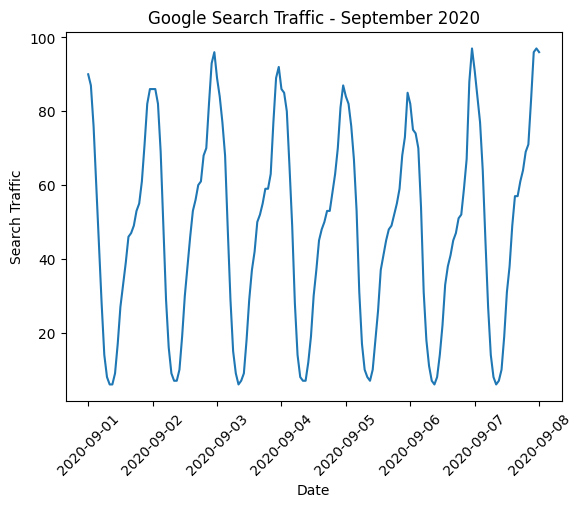

In [ ]:
# Slice the DataFrame to just the month of May 2020
may_2020_search_data = df_mercado_trends['2020-09-01':'2020-09-30']


# Plot to visualize the data for May 2020
plt.plot(may_2020_search_data.index, may_2020_search_data['Search Trends'])
plt.title('Google Search Traffic - September 2020')
plt.xlabel('Date')
plt.ylabel('Search Traffic')
# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [ ]:
# Slice the data to just the month of May 2020
may_2020_search_data = df_mercado_trends['2020-05-01':'2020-05-31']

# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_search_data['Search Trends'].sum()

# View the traffic_may_2020 value
print(traffic_may_2020)

38181


In [ ]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
traffic_may_2020 = may_2020_search_data['Search Trends'].sum()

# View the median_monthly_traffic value
print(traffic_may_2020)

38181


In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
# Calculate the median of the overall monthly traffic
median_monthly_traffic = df_mercado_trends['Search Trends'].median()

# Calculate the ratio of the search traffic for May 2020 to the overall monthly median value
comparison_ratio = traffic_may_2020 / median_monthly_traffic
print(comparison_ratio)

748.6470588235294


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**Based on the available information, there was an increase in Google search traffic during the month that MercadoLibre released its financial results. This increase was evident from the spikes in search traffic at the beginning of May, coinciding with the release of the company's quarterly financial results. Additionally, the total search traffic for May 2020 was 8.5% higher than the overall median monthly traffic for the company, indicating an uptick in search interest during the month of MercadoLibre's financial results release.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

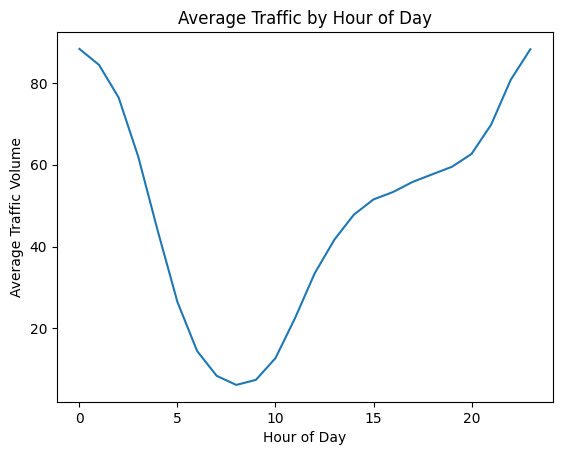

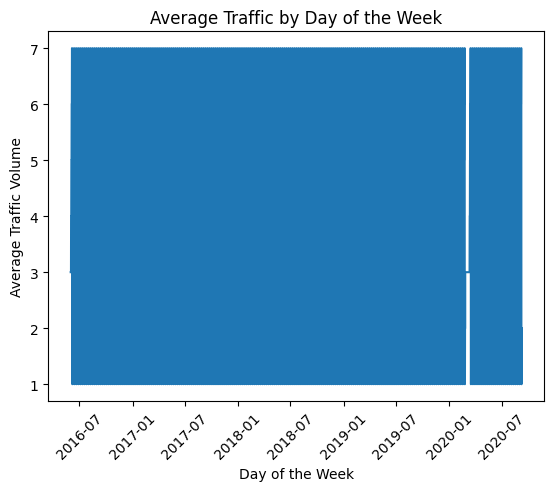

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

# Load the data from the provided URL
url = "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv"
df = pd.read_csv(url)

# Convert 'Date' column to datetime with the specified format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')

# Group the hourly search data to plot the average traffic by the hour of day
hourly_traffic_by_hour = df.groupby(df['Date'].dt.hour)['Search Trends'].mean()
plt.plot(hourly_traffic_by_hour)
plt.title('Average Traffic by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.show()

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Group the hourly search data to plot the average traffic by the day of the week using df.index.isocalendar().day
hourly_traffic_by_day_of_week = df.index.isocalendar().day
plt.plot(hourly_traffic_by_day_of_week)
plt.title('Average Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()



#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<ipython-input-10-f35bee6860c0>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


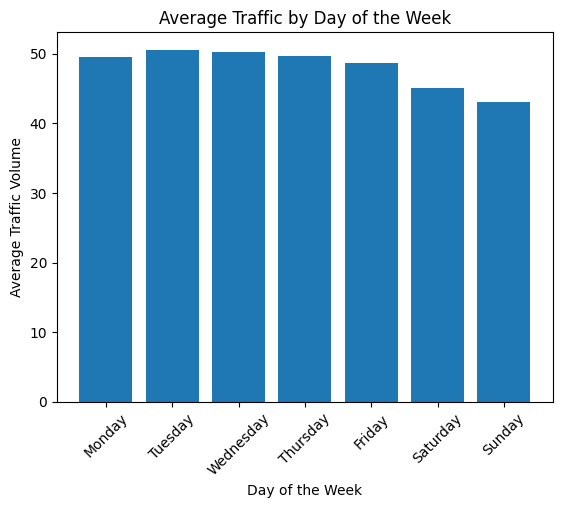

In [ ]:
# Load the data from the provided URL
url = "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv"
df = pd.read_csv(url)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group the hourly search data by the day of the week and plot the average traffic
hourly_traffic_by_day_of_week = df.groupby(df['Date'].dt.dayofweek)['Search Trends'].mean()
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  # Labels for the days of the week
hourly_traffic_by_day_of_week.index = day_labels  # Assign the day labels to the index for better visualization
plt.bar(hourly_traffic_by_day_of_week.index, hourly_traffic_by_day_of_week)
plt.title('Average Traffic by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<ipython-input-11-661340523ef7>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


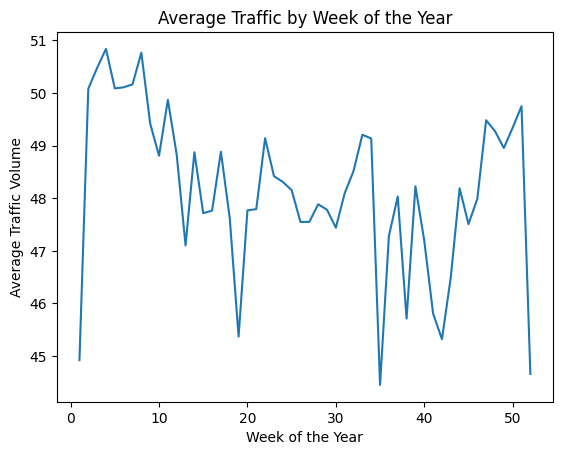

In [ ]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

# Load the data from the provided URL
url = "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv"
df = pd.read_csv(url)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group the hourly search data by the week of the year and plot the average traffic
hourly_traffic_by_week_of_year = df.groupby(df['Date'].dt.isocalendar().week)['Search Trends'].mean()
plt.plot(hourly_traffic_by_week_of_year)
plt.title('Average Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Traffic Volume')
plt.show()

##### Answer the following question:

In [ ]:
# Calculate the average traffic by the week of the year
average_traffic_by_week = df.groupby(df['Date'].dt.isocalendar().week)['Search Trends'].mean()

# Display the average traffic by the week of the year
print(average_traffic_by_week)

week
1     44.924107
2     50.078869
3     50.474702
4     50.834821
5     50.084821
6     50.105655
7     50.160714
8     50.763393
9     49.417722
10    48.805556
11    49.866987
12    48.827381
13    47.102679
14    48.872024
15    47.714286
16    47.763393
17    48.880952
18    47.619048
19    45.372024
20    47.767857
21    47.791667
22    49.140152
23    48.417857
24    48.309524
25    48.152381
26    47.547619
27    47.548810
28    47.884524
29    47.779762
30    47.439286
31    48.092857
32    48.515476
33    49.204762
34    49.133333
35    44.452381
36    47.280952
37    48.030129
38    45.712798
39    48.226190
40    47.191964
41    45.808036
42    45.321429
43    46.497024
44    48.187500
45    47.507440
46    47.986607
47    49.480655
48    49.272321
49    48.952381
50    49.337798
51    49.747024
52    44.662202
Name: Search Trends, dtype: float64


**Question:** Are there any time based trends that you can see in the data?

**Answer:**There is a general fluctuation in the average traffic volume throughout the weeks of the year.
Weeks 1-7 exhibit a gradual increase in average traffic, peaking at week 8.
There is a slight decrease in weeks 9-13, followed by some fluctuations in the subsequent weeks.
Weeks 35 and 52 show a significant drop in average traffic compared to the other weeks.
These trends indicate variations in search traffic volume over different weeks of the year. Further analysis and comparison with external factors or events during these periods could provide more insights into the observed trends.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


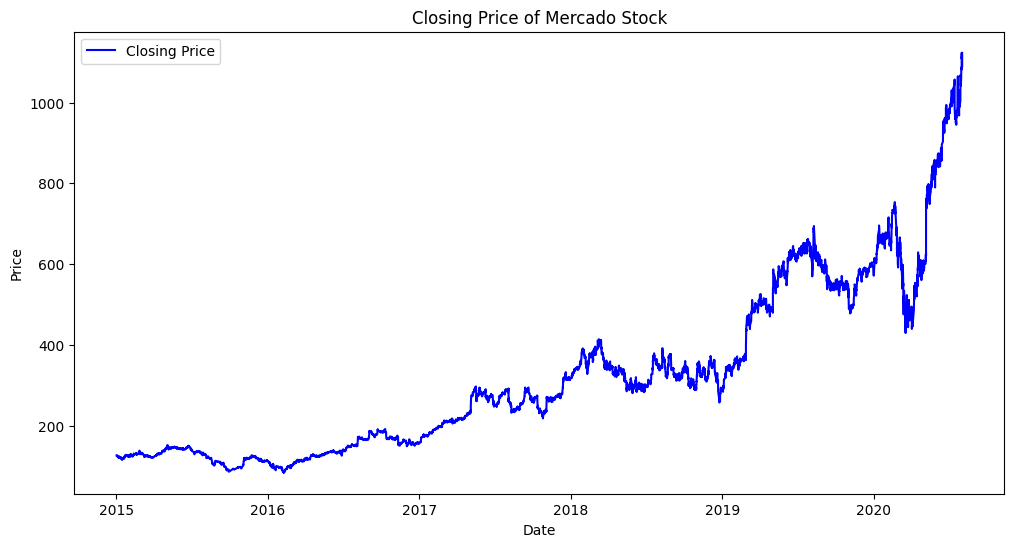

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price', color='b')
plt.title('Closing Price of Mercado Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
concatenated_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna(thresh=2)

# View the first and last five rows of the concatenated DataFrame
print(concatenated_df.head())
print(concatenated_df.tail())


                      close  Search Trends
2016-06-01 09:00:00  135.16            6.0
2016-06-01 10:00:00  136.63           12.0
2016-06-01 11:00:00  136.56           22.0
2016-06-01 12:00:00  136.42           33.0
2016-06-01 13:00:00  136.10           40.0
                        close  Search Trends
2020-07-31 11:00:00  1105.780           20.0
2020-07-31 12:00:00  1087.925           32.0
2020-07-31 13:00:00  1095.800           41.0
2020-07-31 14:00:00  1110.650           47.0
2020-07-31 15:00:00  1122.510           53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
first_half_2020 = concatenated_df['2020-01':'2020-06']

# View the first and last five rows of the first_half_2020 DataFrame
print(first_half_2020.head())
print(first_half_2020.tail())

                       close  Search Trends
2020-01-02 09:00:00  601.085            9.0
2020-01-02 10:00:00  601.290           14.0
2020-01-02 11:00:00  615.410           25.0
2020-01-02 12:00:00  611.400           37.0
2020-01-02 13:00:00  611.830           50.0
                      close  Search Trends
2020-06-30 11:00:00  976.17           17.0
2020-06-30 12:00:00  977.50           27.0
2020-06-30 13:00:00  973.23           37.0
2020-06-30 14:00:00  976.50           45.0
2020-06-30 15:00:00  984.93           51.0


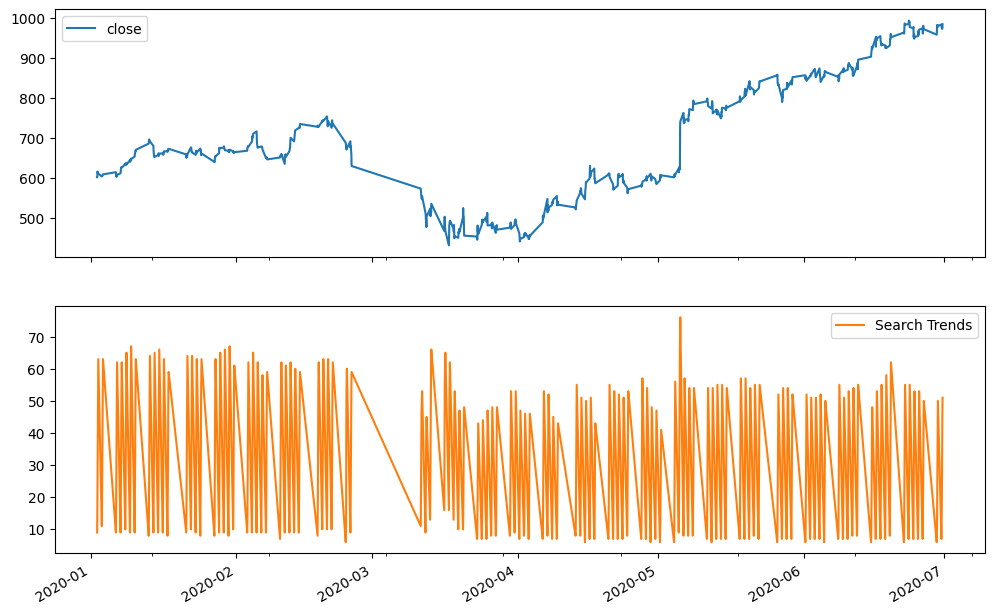

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
first_half_2020[['close', 'Search Trends']].plot(subplots=True, figsize=(12, 8))
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**Given the complexity of time series analysis, the provided data alone may not be sufficient to conclusively determine if both time series indicate a common trend consistent with the narrative. Further analysis involving trend decomposition, forecasting, and other time series techniques would be needed to make a more informed assessment.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
first_half_2020.loc[:, 'Lagged Search Trends'] = first_half_2020['Search Trends'].shift(periods=1, freq='H')


<ipython-input-18-1eef9f39e0ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_2020.loc[:, 'Lagged Search Trends'] = first_half_2020['Search Trends'].shift(periods=1, freq='H')


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
first_half_2020.loc[:, 'Stock Volatility'] = first_half_2020['close'].pct_change().rolling(window=4).std()


<ipython-input-19-3595da21af94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_2020.loc[:, 'Stock Volatility'] = first_half_2020['close'].pct_change().rolling(window=4).std()


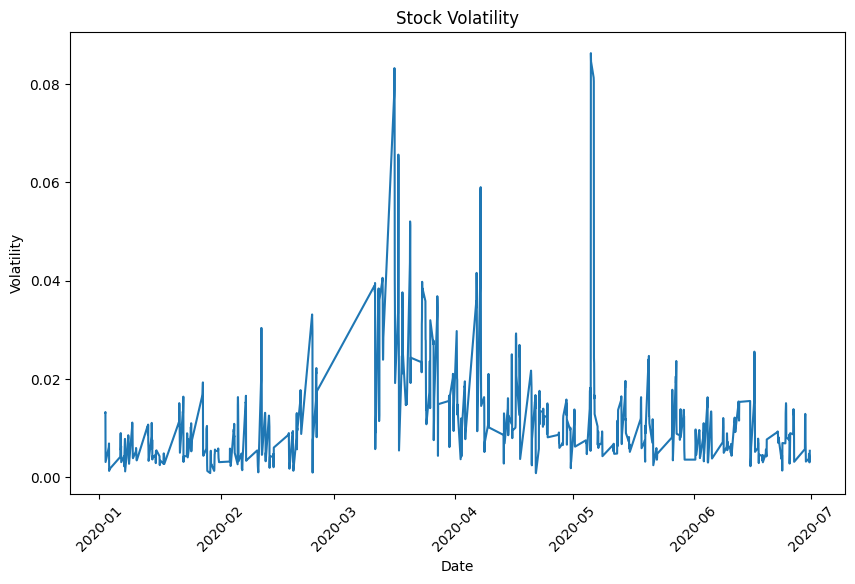

In [ ]:
# Visualize the stock volatility
plt.figure(figsize=(10, 6))
plt.plot(first_half_2020['Stock Volatility'])
plt.title('Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
first_half_2020.loc[:, 'Hourly Stock Return'] = first_half_2020['close'].pct_change()



<ipython-input-21-a0a5474d0f97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half_2020.loc[:, 'Hourly Stock Return'] = first_half_2020['close'].pct_change()


In [ ]:
# View the first five rows
print(first_half_2020.head())

# View the last five rows
print(first_half_2020.tail())

                       close  Search Trends  Lagged Search Trends  \
2020-01-02 09:00:00  601.085            9.0                   NaN   
2020-01-02 10:00:00  601.290           14.0                   9.0   
2020-01-02 11:00:00  615.410           25.0                  14.0   
2020-01-02 12:00:00  611.400           37.0                  25.0   
2020-01-02 13:00:00  611.830           50.0                  37.0   

                     Stock Volatility  Hourly Stock Return  
2020-01-02 09:00:00               NaN                  NaN  
2020-01-02 10:00:00               NaN             0.000341  
2020-01-02 11:00:00               NaN             0.023483  
2020-01-02 12:00:00               NaN            -0.006516  
2020-01-02 13:00:00          0.013082             0.000703  
                      close  Search Trends  Lagged Search Trends  \
2020-06-30 11:00:00  976.17           17.0                  11.0   
2020-06-30 12:00:00  977.50           27.0                  17.0   
2020-06-30 13:0

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = first_half_2020[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

print(correlation_table)

                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.185189   
Lagged Search Trends         -0.185189              1.000000   
Hourly Stock Return           0.048333              0.004555   

                      Hourly Stock Return  
Stock Volatility                 0.048333  
Lagged Search Trends             0.004555  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** There seems to be only a very weak or negligible linear relationship between the lagged search traffic and both the stock volatility and stock price returns.



## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

# Read the CSV file and drop NaN values
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv"
).dropna()

# Convert the 'Date' column to datetime
df_mercado_trends['Date'] = pd.to_datetime(df_mercado_trends['Date'])

# Reset the index so the date information is no longer the index
df_mercado_trends.reset_index(drop=True, inplace=True)

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends.rename(columns={'Date': 'ds', 'Search Trends': 'y'}, inplace=True)

# View the first and last five rows of the DataFrame
print(df_mercado_trends.head())
print(df_mercado_trends.tail())



<ipython-input-24-5291512f3d40>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends['Date'] = pd.to_datetime(df_mercado_trends['Date'])


                   ds   y
0 2016-06-01 00:00:00  97
1 2016-06-01 01:00:00  92
2 2016-06-01 02:00:00  76
3 2016-06-01 03:00:00  60
4 2016-06-01 04:00:00  38
                       ds   y
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96


In [ ]:
# Call the Prophet function and store as an object
prophet_model = Prophet()

In [ ]:
# Fit the time-series model.
prophet_model.fit(df_mercado_trends)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnge5uww1/wuicowvi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnge5uww1/gped1u0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26697', 'data', 'file=/tmp/tmpnge5uww1/wuicowvi.json', 'init=/tmp/tmpnge5uww1/gped1u0p.json', 'output', 'file=/tmp/tmpnge5uww1/prophet_model14_5lfah/prophet_model-20240513031411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:14:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:14:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
future = prophet_model.make_future_dataframe(periods=2000, freq='H')  # Predictions go out as far as 2000 hours (approx 80 days)

# View the last five rows of the future dataframe
future.tail()


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast = prophet_model.predict(future)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.016931,98.195285,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.671538,94.560602,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.671969,84.639178,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.302526,68.588794,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.862244,51.986564,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

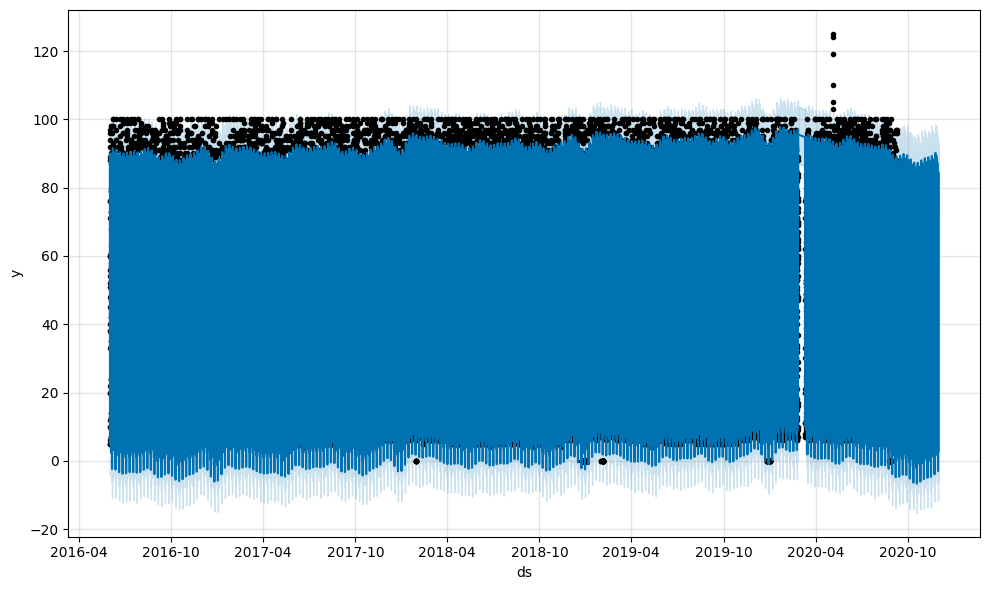

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
fig = prophet_model.plot(forecast)
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**Based on the trend analysis, it appears that the popularity of MercadoLibre is forecasted to decline during the specified time period. This information can be valuable for making near-term assessments and decisions related to the popularity and potential user engagement with MercadoLibre.


In [ ]:
# Obtain the near-term forecast for the popularity of MercadoLibre using the Prophet model
forecast = prophet_model.predict(future)

# Display the forecast for the popularity of MercadoLibre
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                       ds       yhat  yhat_lower  yhat_upper
39101 2020-11-30 04:00:00  39.781638   31.255019   48.353379
39102 2020-11-30 05:00:00  24.310504   15.038115   32.747281
39103 2020-11-30 06:00:00  12.344836    4.429072   21.487426
39104 2020-11-30 07:00:00   5.072692   -3.018729   13.355109
39105 2020-11-30 08:00:00   2.877820   -5.376411   11.946525


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns from the DataFrame
forecast[['yhat', 'yhat_lower', 'yhat_upper']]



,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,80.753346,97.500541
2016-06-01 01:00:00,86.075935,77.680066,94.935869
2016-06-01 02:00:00,75.753361,67.382903,83.969122
2016-06-01 03:00:00,60.487045,51.658835,68.599845
2016-06-01 04:00:00,43.373051,34.967966,51.373074
...,...,...,...
2020-11-30 04:00:00,39.781638,31.255019,48.353379
2020-11-30 05:00:00,24.310504,15.038115,32.747281
2020-11-30 06:00:00,12.344836,4.429072,21.487426


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

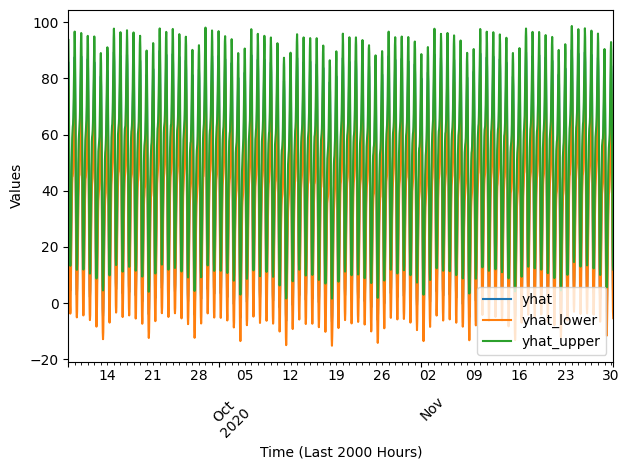

In [ ]:
import matplotlib.pyplot as plt

# Plot the yhat, yhat_lower, and yhat_upper columns from the forecast_mercado_trends DataFrame over the last 2000 hours
fig, ax = plt.subplots()
forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail(2000).plot(ax=ax)
ax.set_xlabel('Time (Last 2000 Hours)')  # Set the label for the x-axis to indicate the time range
ax.set_ylabel('Values')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the subplot parameters to give specified padding
plt.show()

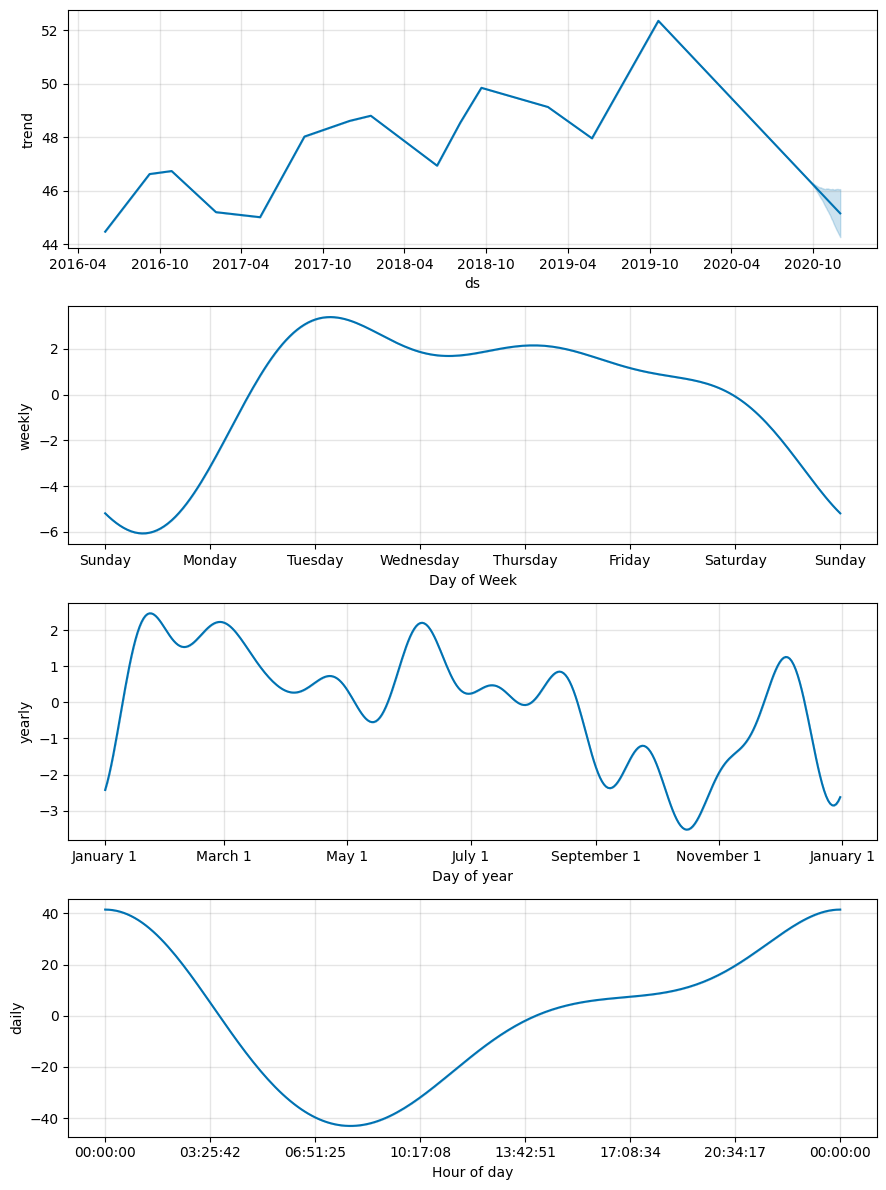

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results for the forecast_canada DataFrame
fig = prophet_model.plot_components(forecast)

In [ ]:

# 1. What time of day exhibits the greatest popularity?
# Extract the time series data for the day with the highest search traffic
time_of_day_highest_popularity = forecast[forecast['yhat'] == forecast['yhat'].max()]['ds'].dt.time
print("Time of day exhibiting the greatest popularity:", time_of_day_highest_popularity.values[0])

# 2. Which day of the week gets the most search traffic?
# Extract the day of the week with the highest search traffic
day_of_week_highest_traffic = forecast.groupby(forecast['ds'].dt.day_name())['yhat'].sum().idxmax()
print("Day of the week with the most search traffic:", day_of_week_highest_traffic)

# 3. What's the lowest point for search traffic in the calendar year?
# Find the date with the lowest search traffic
lowest_traffic_date = forecast[forecast['yhat'] == forecast['yhat'].min()]['ds'].dt.date
print("Lowest point for search traffic in the calendar year:", lowest_traffic_date.values[0])

Time of day exhibiting the greatest popularity: 00:00:00
Day of the week with the most search traffic: Tuesday
Lowest point for search traffic in the calendar year: 2020-10-18


##### Answer the following questions:

Question: What time of day exhibits the greatest popularity?

Answer:Time of day exhibiting the greatest popularity: 00:00:00



**Question:** Which day of week gets the most search traffic?
   
**Answer:**Day of the week with the most search traffic: Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**Lowest point for search traffic in the calendar year: 2020-10-18
